## 03. 데이터 전처리의 실습
### 데이터 전처리 실습하기 : 타이타닉 생존자 예측하기

- 데이터를 분석하는 실습을 하기 전에, 데이터를 확보하기 위해 실제 데이터가 필요
- 많은 엔지니어들이 연습을 위해 데이터를 제공하고 있음
    - 캐글(Kaggle)
        - https://www.kaggle.com/
    - 데이콘(DACON)
        - https://dacon.io/

- 데이터 전처리 실습하기 : 타이타닉 생존자 예측하기
    - 타이타닉 문제는 매우 기본적인 데이터를 가지고 있으면서도 평가 등의 방법이 매우 쉬움
        - 때문에 많은 사람들이 첫 번째 데이터셋으로 사용
        - https://www.kaggle.com/c/titnic/data

#### 데이터 확인하기
- 파일 경로는 C:\Machine_Learning (git)\chapter06
    - 이 안에 두 개의 실습 데이터인 train.csv, test.csv가 있음

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set(style= 'whitegrid', color_codes= True)
DATA_DIR = 'C:/Machine_Learning (git)/chapter06/source'
os.listdir(DATA_DIR)

- test.csv와 train.csv를 가져온 후, 파일 순서를 바꾸고 상대 경로 리스트 생성

In [3]:
DATA_DIR = 'C:/Machine_Learning (git)/chapter06/source'
data_files = sorted([os.path.join(DATA_DIR, filename) 
                     for filename in os.listdir(DATA_DIR)], reverse= True)
data_files

['C:/Machine_Learning (git)/chapter06/source\\train.csv',
 'C:/Machine_Learning (git)/chapter06/source\\test.csv']

- train.csv와 test.csv 파일을 하나의 데이터프레임으로 생성하기 위해 코드 실행

In [4]:
df_list = []
for filename in data_files :
    df_list.append(pd.read_csv(filename))
# 데이터프레임을 각 파일에서 읽어온 후 df_list에 추가

df = pd.concat(df_list, sort= False)
# 두 개의 데이터프레임을 하나로 통합

df = df.reset_index(drop= True)
# 인덱스 초기화

df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 데이터 열 확인하기
- 확보된 데이터를 바탕으로 데이터의 열 확인
    - 예측하고자 하는 값은 Survived이며 이것이 $y = f(x)$에서 $y$값에 해당
        - Survived를 예측하기 위해 test.csv에서 Survived 열을 추출해야 함

In [5]:
number_of_train_dataset = df.Survived.notnull().sum()
# train.csv 데이터의 수
number_of_test_dataset = df.Survived.isnull().sum()
# test.csv 데이터의 수
y_true = df.pop("Survived")[:number_of_train_dataset]
# train.csv 데이터의 y값 추출

#### 데이터 노트 작성하기
- 데이터 노트를 작성해야 함
    - 데이터 노트 : 우리가 분석해야 할 데이터에 대한 여러 아이디어를 정리하는 노트
- 가장 쉬운 방법으로는 하나의 테이블 형태로 다양한 내용들을 적어 놓는 것

- 데이터 노트를 정리할 때 중요한 것은 "각 데이터의 현재 데이터 타입이 올바르게 정의되어 있는가"
    - 어떤 데이터 타입의 경우 숫자로 표시되어 있지만, 사실은 범주형 데이터로 변형이 필요한 경우가 있음
        - 불린형 등으로 데이터 타입을 바꿔서 표현하기

- 이런 다양한 아이디어들을 데이터 노트에 정리하면서 다양한 실험을 하는 것이 데이터 전처리 단계에서 가장 중요한 시도

In [6]:
df.head(2).T
# 데이터의 기초적인 모양을 확인하기에 가장 좋은 전략은 다음 코드와 같이 T 함수를 사용하는 것
    # transpose 함수를 의미하는 T 함수를 사용하면 데이터를 가로로 한 줄씩 보여줌
        # 데이터 안에 있는 값들을 확인하기 좋음

,0,1
PassengerId,1,2
Pclass,3,1
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th..."
Sex,male,female
Age,22.0,38.0
SibSp,1,1
Parch,0,0
Ticket,A/5 21171,PC 17599
Fare,7.25,71.2833
Cabin,NaN,C85


#### 결측치 확인하기
- 의미 있는 데이터를 확인한 후 첫 번째 할 일은 결측치를 확인하는 것

- 결측치는 각 열 별로 비율을 확인하는 것이 좋음
    - 전체 데이터의 개수와 함께 결측치의 비율을 확인하여 데이터 정리 전략을 세워야 함

In [7]:
pd.options.display.float_format = '{:.2f}'.format
# 데이터를 소수점 두 번째 자리까지 출력

df.isnull().sum() / len(df) * 100
# 결측치 값의 합을 데이터의 개수로 나누어 비율로 출력

PassengerId    0.00
Pclass         0.00
Name           0.00
Sex            0.00
Age           20.09
SibSp          0.00
Parch          0.00
Ticket         0.00
Fare           0.08
Cabin         77.46
Embarked       0.15
dtype: float64

- 코드의 결과에서 보듯이 Age, Cabin, Embarked, Fare 등에 결측치가 존재함
- 전략적인 의사결정을 해야 함
    - 예를 들어 Cabin의 경우 결측치가 많기 때문에 해당 데이터를 살리는 것보다 아예 삭제한다는 의사결정을 할 수 있음
        - 이러한 의사결정은 데이터가 존재할 때의 성능과 그렇지 않을 때의 성능을 비교해서 결정

    - 결측치를 채울 때는 어떻게 채울지에 대한 결정이 필요
        - 예를 들어 Age의 경우 처리해야 할 수준의 결측치가 존재한다는 것을 확인할 수 있음
            - 이를 처리하기 위해 먼저 Age와 관련된 평균치를 얻어야 함
        - 결측치는 일반적으로 평균값이나 최빈값, 또는 그 데이터의 특성을 사용하여 모델을 생성한 후 예측치를 채워넣을 수 있음

In [8]:
df[df["Age"].notnull()].groupby(["Sex"])["Age"].mean()
# 평균치로 결측치를 채우는 방법 선택

Sex
female   28.69
male     30.59
Name: Age, dtype: float64

In [9]:
df[df['Age'].notnull()].groupby(['Pclass'])['Age'].mean()
# 평균치로 결측치를 채우는 방법 선택

Pclass
1   39.16
2   29.51
3   24.82
Name: Age, dtype: float64

- 위 데이터를 보면 구분 기준이 Sex일 때보다 Pclass일 때 데이터의 특성이 잘 나타남
    - Sex열의 경우 데이터의 평균치가 비슷함
    - Pclass의 경우 클래스별로 평균치가 꽤 큰 값으로 차이가 남
    - 엄밀한 방법으로는 통계학의 여러 도구들을 사용하여 분석할 수 있음

- 데이터를 채울 때는 fillna를 사용

In [10]:
df["Age"].fillna(
    df.groupby("Pclass")["Age"].transform("mean"), inplace= True)
# Pclass를 기준으로 Age열의 평균을 예측
# transform 함수 사용
df.isnull().sum() / len(df) * 100

PassengerId    0.00
Pclass         0.00
Name           0.00
Sex            0.00
Age            0.00
SibSp          0.00
Parch          0.00
Ticket         0.00
Fare           0.08
Cabin         77.46
Embarked       0.15
dtype: float64

In [11]:
df.loc[61, "Embarked"] = 'S'
df.loc[829, "Embarked"] = 'S'
# Embarked의 경우 mode를 기준으로 보면 S가 가장 많음
    # 이를 고려해서 비어있는 값을 S로 채움

#### 범주형 데이터 처리 : 원핫인코딩
- 데이터의 형태에 따라 어떻게 처리할 지를 결정해야 함

- 먼저 데이터 별로 데이터 타입 확인

In [12]:
df.info()
# 여기서는 df.info() 함수를 사용하여 데이터 형태를 확인함

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1309 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1309 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


- info 함수를 사용하면 열별로 데이터 타입 확인 가능

- 데이터를 분석할 때 중요한 것중 하나는 먼저 데이터 특성별로 열을 분류하는 것
    - 데이터 열별로 문자열 리스트 타입으로 정리해야 함
- 다음으로 각 데이터에 맞춰 astype을 사용하여 데이터의 타입을 정리할 필요가 있음
    - 때에 따라 정수형 데이터를 객체타입으로 변경 or 그 반대가 필요한 경우가 생김

In [13]:
object_columns = ["PassengerId", "Pclass", "Name", "Sex",
                  "Ticket", "Cabin", "Embarked"]
numeric_columns = ["Age", "SibSp", "Parch", "Fare"]

for col_name in object_columns :
    df[col_name] = df[col_name].astype(object)

for col_name in numeric_columns :
    df[col_name] = df[col_name].astype(float)

df["Parch"] = df["Parch"].astype(int)
df["SibSp"] = df["SibSp"].astype(int)

- 다음으로 각 범주형 열 중 데이터의 유형이 작은 세 가지 데이터(Sex, Pclass, Embarked)를 원핫인코딩(one-hot-encoding)으로 처리
    - 이를 위해 원본 데이터와 변형된 데이터를 merge 하는 함수 제작

In [14]:
def merge_and_get(ldf, rdf, on, how= "inner", index= None) :
    if index is True :
        return pd.merge(ldf, rdf, how= how, left_index= True, right_index= True)
    
    else :
        return pd.merge(ldf, rdf, how= how, on= on)

In [29]:
# get_dummies를 활용하여 데이터의 원핫인코딩 벡터 생성 후 원본 데이터와 통합

one_hot_df = merge_and_get(
    df, pd.get_dummies(df['Sex'], prefix= "Sex"), on= None, index= True)
one_hot_df = merge_and_get(
    one_hot_df, pd.get_dummies(df['Pclass'], prefix= "Pclass"), on= None, index= True)
one_hot_df = merge_and_get(
    one_hot_df, pd.get_dummies(df['Embarked'], prefix= "Embarked"), on= None, index= True)
one_hot_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S,False,True,False,False,True,False,False,True
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C,True,False,True,False,False,True,False,False
2,3,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S,True,False,False,False,True,False,False,True
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S,True,False,True,False,False,False,False,True
4,5,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S,False,True,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,24.82,0,0,A.5. 3236,8.05,NaN,S,False,True,False,False,True,False,False,True
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00,0,0,PC 17758,108.90,C105,C,True,False,True,False,False,True,False,False
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50,0,0,SOTON/O.Q. 3101262,7.25,NaN,S,False,True,False,False,True,False,False,True
1307,1308,3,"Ware, Mr. Frederick",male,24.82,0,0,359309,8.05,NaN,S,False,True,False,False,True,False,False,True


#### 데이터 시각화 진행하기
- 범주형 데이터를 분석할 때 항상 $y$값과 각 범주형 타입 간 어떤 관계가 있는지 확인 필요

- 데이터 분석을 처음 시작할 때 생성했던 y_true 데이터와 각 열 이름 데이터를 합쳐서 비교 그래프(counter plot)로 나타내기
    - 각 열별로 y_true 데이터를 비교하면 열별로 생존 여부에 영향을 주는지 시각적으로 확인 가능
    - 시각적으로 확인할 때 주의점
        - 데이터의 유형별로 y_true 데이터의 분포의 변화가 있는가?
            - 실행 결과로 나타난 그래프에서 Embarked를 기준으로 생전 여부에 대한 분포의 경우 모두 비슷한 것으로 확인 됨
            - 그러나 Sex, Pclass는 차이가 남
                - Sex, Pclass가 Embarked에 비해 생존 여부에 영향을 줬을 것으로 판단
    - 시각적 분석을 통해 데이터의 상황을 파악하는 것은 매우 중요한 데이터 분석 기법 중 하나


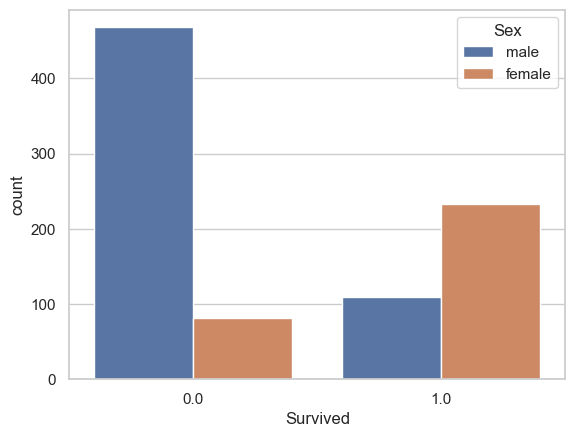

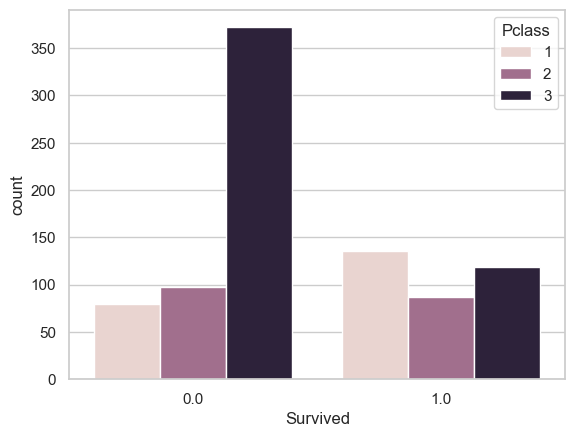

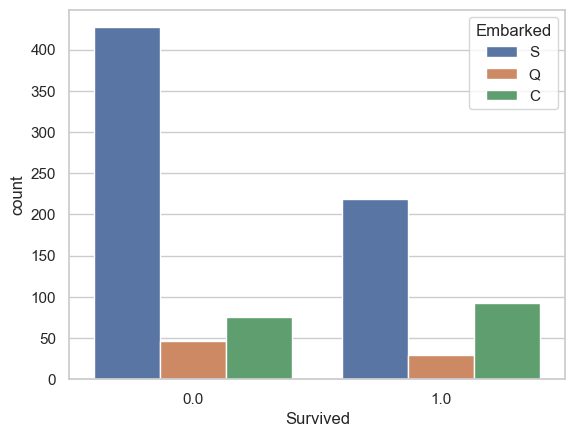

In [20]:
temp_columns = ["Sex", "Pclass", "Embarked"]

for col_name in temp_columns :
    temp_df = pd.merge(
        one_hot_df[col_name], y_true, left_index= True, right_index= True)
    sns.countplot(x= "Survived", hue= col_name, data= temp_df)
    plt.show()

- 범주형 데이터는 한 개 이상의 열에 대한 상관관계 분석도 필요
    - 예를 들면 'Sex와 Pclass간의 관계는 어떨까?' 등에 대한 분석
- 이를 위해 다음과 같이 범주형 데이터 간의 상관관계를 분석할 필요가 있음

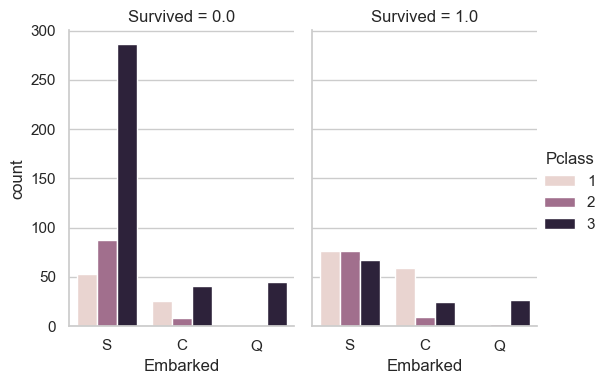

In [21]:
temp_df = pd.merge(one_hot_df[temp_columns],
                   y_true, left_index= True,
                   right_index= True)
g = sns.catplot(x= "Embarked",
                hue= "Pclass",
                col= "Survived",
                data= temp_df,
                kind= "count",
                height= 4, aspect= .7)

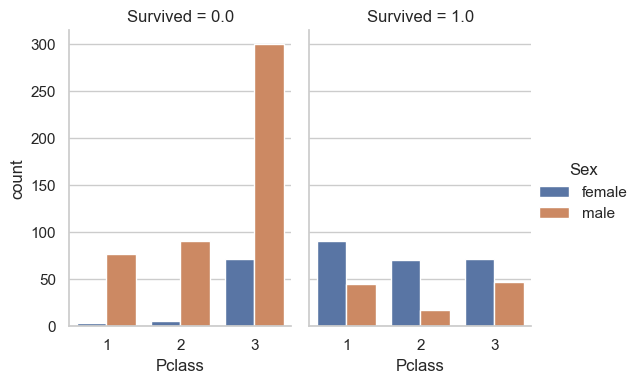

In [27]:
temp_df = pd.merge(
    one_hot_df[temp_columns],
    y_true, left_index= True,
    right_index= True)
g = sns.catplot(x= "Pclass",
                hue= "Sex", col= "Survived",
                data= temp_df, kind= "count",
                height= 4, aspect= .7)

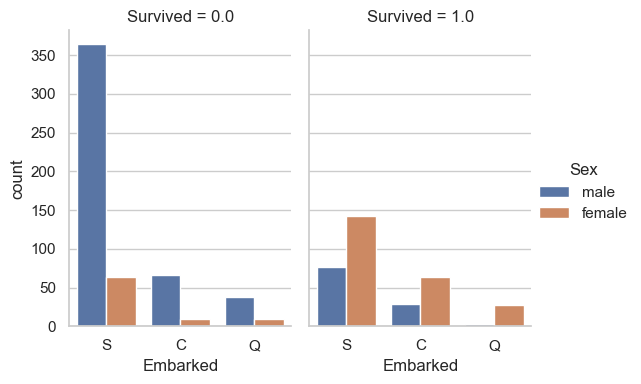

In [28]:
temp_df = pd.merge(
    one_hot_df[temp_columns],
    y_true, left_index= True,
    right_index= True)

g = sns.catplot(
    x= "Embarked", hue= "Sex",
    col= "Survived",
    data= temp_df, kind= "count",
    height= 4, aspect= .7)

- 이런 결과를 하나의 수치로 나타내기 위해서는 히트맵을 나타내는 Heatmap 함수 사용
    - correlation 데이터로 확인

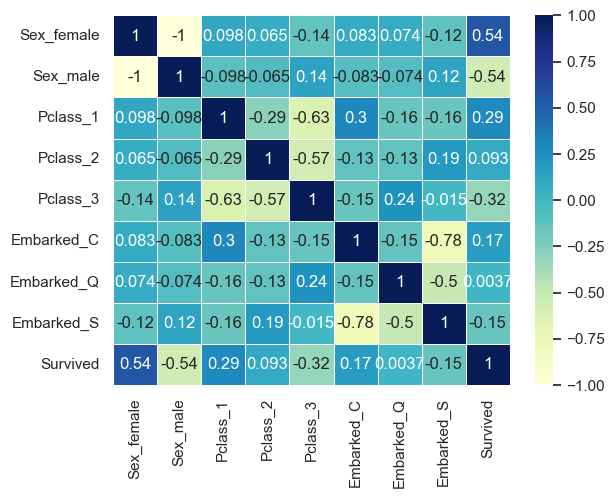

In [31]:
crosscheck_columns = [col_name for col_name in one_hot_df.columns.tolist()
                      if col_name.split("_")[0] in temp_columns and "_" in col_name] + ["Sex"]

temp_df = pd.merge(one_hot_df[crosscheck_columns], y_true,
                   left_index= True, right_index= True)
# temp 열
corr = temp_df.corr(numeric_only= True)
sns.set()
ax = sns.heatmap(corr, annot= True, linewidths= .5, cmap= "YlGnBu")